<a href="https://colab.research.google.com/github/hochthom/OG-AI4Artists-2021/blob/main/Lecture2_Object-Detection_Example/Face_Detection_with_Mediapipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Usage example of MediaPipe Face Detection Solution API in Python (see also http://solutions.mediapipe.dev/face_detection).

In [1]:
!pip install mediapipe

     |████████████████████████████████| 47.4MB 92kB/s 


In [2]:
import cv2
from google.colab import files
from google.colab.patches import cv2_imshow

Upload any image that contains face(s) to the Colab.

In [11]:
uploaded = files.upload()

Saving mathias-konrath-BBjW2qnIixc-unsplash_downscaled.jpg to mathias-konrath-BBjW2qnIixc-unsplash_downscaled.jpg


In [12]:
# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}

# Preview the images.
for name, image in images.items():
  print(name, image.shape)   

mathias-konrath-BBjW2qnIixc-unsplash_downscaled.jpg (524, 786, 3)


mathias-konrath-BBjW2qnIixc-unsplash_downscaled.jpg


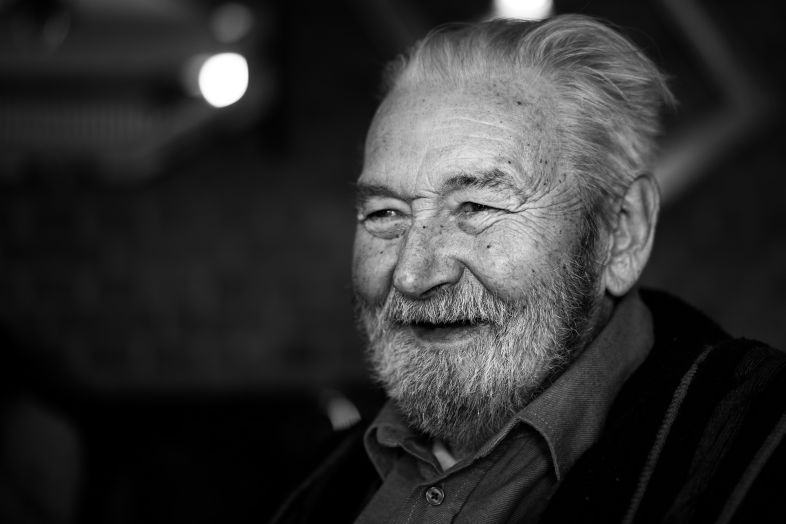

In [13]:
print(name)
image = images[name]
cv2_imshow(image)

All MediaPipe Solutions Python API examples are under mp.solutions.


In [6]:
import mediapipe as mp
mp_face_detection = mp.solutions.face_detection

The parameter min_detection_confidence parameter determines the quality of our detections.

In [ ]:
help(mp_face_detection.FaceDetection)

In [8]:
# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

Face detections of mathias-konrath-BBjW2qnIixc-unsplash_downscaled.jpg:


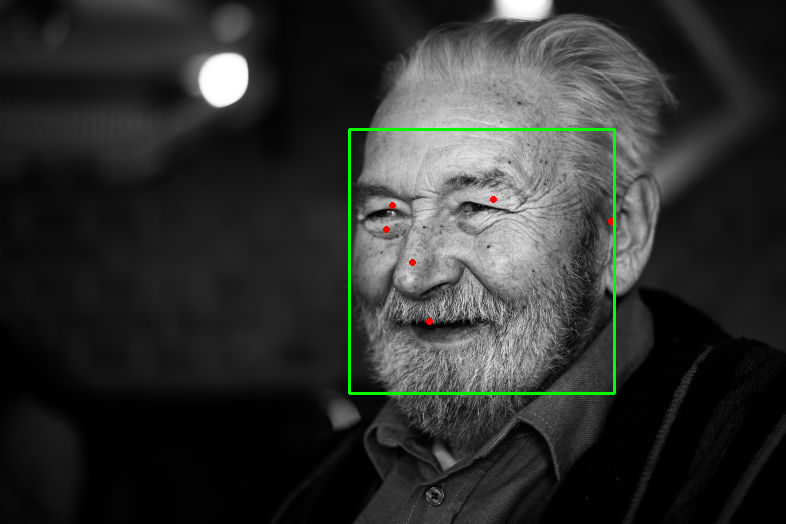

In [15]:
with mp_face_detection.FaceDetection(min_detection_confidence=0.5) as face_detection:
    # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw face detections of each face.
    print(f'Face detections of {name}:')

    annotated_image = image.copy()
    for detection in results.detections:
        # print('Nose tip:')
        # print(mp.python.solutions.face_detection.get_key_point(
        #     detection, mp_face_detection.FaceKeyPoints.NOSE_TIP))
        mp_drawing.draw_detection(annotated_image, detection)

    cv2_imshow(annotated_image)